# Explicación del Código para Carga, Preprocesamiento y Normalización del Dataset MNIST con Keras

Este código prepara el dataset MNIST para su uso en modelos de deep learning mediante el preprocesamiento de las imágenes y las etiquetas. A continuación se explican cada uno de los pasos involucrados:

## 1. Importación de Librerías y Configuración de Semilla

- **Importación de Librerías**: Se importan las librerías `numpy` para operaciones numéricas, `matplotlib.pyplot` para visualización, `os` para operaciones del sistema, y `keras` para el manejo de deep learning.
- **Configuración de Semilla Aleatoria**: Se establece una semilla con `keras.utils.set_random_seed(23)`, lo cual asegura que los resultados sean reproducibles. También se desactiva el nivel de log de TensorFlow (`TF_CPP_MIN_LOG_LEVEL = '2'`) para evitar mensajes de advertencia innecesarios.

## 2. Carga del Dataset MNIST

- **Carga de Datos**: Se utiliza `keras.datasets.mnist.load_data()` para cargar el conjunto de datos MNIST. Este contiene imágenes de dígitos escritos a mano, divididas en conjuntos de entrenamiento (`x_train`, `y_train`) y prueba (`x_test`, `y_test`).
- **Verificación de la Carga**: Se imprime la forma de los datos cargados para verificar que los conjuntos tienen las dimensiones correctas: `(60000, 28, 28)` para `x_train` (60000 imágenes de 28x28 píxeles) y `(10000, 28, 28)` para `x_test`.

## 3. Reformateo y Normalización de Datos

- **Redimensionamiento de Imágenes**: Las imágenes son reformateadas a vectores 1D. `x_train` y `x_test` se redimensionan de matrices 28x28 a vectores de longitud 784 (28*28) para que cada imagen se represente como un solo vector.
- **Normalización de Imágenes**: Se normalizan los valores de los píxeles para que queden en un rango `[0, 1]`. Esto se hace dividiendo cada valor de píxel por el valor máximo (255). La normalización mejora la eficiencia y el rendimiento del modelo.

## 4. Conversión de Etiquetas a Formato Categórico

- **Conversión a Categórico**: Las etiquetas (dígitos del 0 al 9) se convierten a formato categórico utilizando `keras.utils.to_categorical`, transformando cada etiqueta en un vector binario de 10 posiciones. Esto es necesario para tareas de clasificación multicategoría.
- **Verificación de la Conversión**: Se imprime la forma de los datos procesados para confirmar que tanto las imágenes (`x_train` y `x_test`) como las etiquetas (`y_train` y `y_test`) están en el formato adecuado para el entrenamiento del modelo.

Este proceso asegura que las imágenes están en un formato vectorial normalizado y que las etiquetas están listas para el modelo de clasificación multicategoría.


In [ ]:
# Import necessary libraries and set seed
import numpy as np
import matplotlib.pyplot as plt
import os
import keras

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
keras.utils.set_random_seed(23)

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(f'Lectura: train {x_train.shape} {y_train.shape} test {x_test.shape} {y_test.shape}')

# Reshape data and normalize
input_dim = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(-1, input_dim).astype("float32")
x_test = x_test.reshape(-1, input_dim).astype("float32")
print(f'Reformato 1: train {x_train.shape} {y_train.shape} test {x_test.shape} {y_test.shape}')

# Normalize input data to the range [0,1]
# This is done to improve the performance of the model
# by reducing the effect of features with large ranges
x_train_max = np.max(x_train)
x_train /= x_train_max
x_test /= x_train_max
print(f'Normalización [0,1]: max = {x_train_max}')

# Convert labels to categorical format
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(f'Reformato 2: train {x_train.shape} {y_train.shape} test {x_test.shape} {y_test.shape}')

2024-11-14 23:42:23.176918: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731624143.189517   95907 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731624143.193200   95907 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-14 23:42:23.205238: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Lectura: train (60000, 28, 28) (60000,) test (10000, 28, 28) (10000,)
Reformato 1: train (60000, 784) (60000,) test (10000, 784) (10000,)
Normalización [0,1]: max = 255.0
Reformato 2: train (60000, 784) (60000, 10) test (10000, 784) (10000, 10)


# Explicación del Código para Definir y Compilar un Modelo MLP Simple para MNIST

Este código construye y compila un modelo de red neuronal multicapa (MLP) para clasificar dígitos en el conjunto de datos MNIST. A continuación se explican los pasos principales.

## 1. Definición del Modelo MLP

Se crea un modelo secuencial `keras.Sequential` compuesto por las siguientes capas:
- **Capa de Entrada**: Configurada con el tamaño `input_dim` (784), que corresponde a las dimensiones de cada imagen aplanada de 28x28 píxeles.
- **Capa Densa Oculta**: Una capa completamente conectada con 800 neuronas y función de activación `relu`. Esta capa aprende patrones de las imágenes y extrae características relevantes para la clasificación.
- **Capa de Salida**: Una capa con `num_classes` (10) neuronas y activación `softmax`, que produce una probabilidad para cada una de las 10 clases del dataset MNIST.

El uso de `softmax` en la capa de salida permite al modelo generar probabilidades para cada clase, con una salida que suma 1, adecuada para problemas de clasificación multicategoría.

## 2. Resumen del Modelo

Se imprime el resumen del modelo con `M.summary()`, lo cual muestra el tipo y tamaño de cada capa y permite verificar la estructura del modelo.

## 3. Cálculo del Número de Parámetros

Para comprender la complejidad del modelo, se calcula el número de parámetros en cada capa:
- **Capa Oculta**: El número de parámetros es `784*800 + 800` (conexiones + bias).
- **Capa de Salida**: El número de parámetros es `800*10 + 10`.

Estos cálculos ayudan a comprender la cantidad de memoria y capacidad de computación necesarias para entrenar el modelo.

Las capas densas en una red neuronal son uno de los tipos de capas más comunes en modelos de aprendizaje profundo. En una capa densa, cada neurona está conectada a todas las neuronas de la capa anterior, de ahí que también se le llame capa totalmente conectada (fully connected layer).

En una capa densa:

Cada neurona realiza una operación matemática, calculando una combinación lineal de las entradas y aplicando una función de activación (como ReLU, sigmoid, o softmax) al resultado.
Las conexiones entre neuronas se representan mediante pesos (parámetros que se ajustan durante el entrenamiento) y sesgos que permiten que cada neurona aprenda patrones específicos.

## 4. Compilación del Modelo

El modelo se compila con los siguientes ajustes:
- **Loss**: Se utiliza `categorical_crossentropy`, una función de pérdida adecuada para problemas de clasificación multicategoría.
- **Optimizer**: Se emplea `adam`, un algoritmo de optimización adaptativa eficiente que ajusta los pesos del modelo para minimizar la pérdida.
- **Metrics**: Se utiliza `accuracy` como métrica para monitorear el rendimiento del modelo durante el entrenamiento.

Este proceso de compilación prepara el modelo para el entrenamiento, estableciendo cómo calcular el error y cómo ajustar los pesos para reducir la pérdida.

## Capas, tipos y su significado

**Capa Oculta**

La capa oculta es cualquier capa que está entre la capa de entrada (la primera capa que recibe los datos) y la capa de salida (la capa que genera la predicción final). Las capas ocultas no interactúan directamente con los datos de entrada o con la salida final, pero son fundamentales para aprender y extraer patrones complejos en los datos.

Características de la capa oculta:

Contiene neuronas (unidades o nodos) que están conectadas a la capa anterior y la siguiente.
Su objetivo es transformar los datos, extrayendo características de mayor nivel o representaciones más complejas.
Cada neurona aplica una función de activación (como ReLU o tanh) que introduce no linealidad, permitiendo que la red aprenda relaciones complejas entre los datos de entrada y la salida.

En el ejemplo de MNIST, una capa oculta con 800 neuronas toma las características iniciales de los datos (784 en total, para las imágenes de 28x28 píxeles) y aprende patrones que ayudarán en la clasificación.

**Capa de Salida**

La capa de salida es la última capa de la red neuronal y produce el resultado final del modelo. Este resultado depende del tipo de problema:

En problemas de clasificación (como MNIST, donde el objetivo es clasificar dígitos del 0 al 9), la capa de salida normalmente tiene un número de neuronas igual al número de clases (10 en este caso) y utiliza una función de activación softmax. Softmax convierte las salidas en probabilidades, y la clase con mayor probabilidad es la predicción final del modelo.
En problemas de regresión (cuando el objetivo es predecir valores continuos), la capa de salida suele tener solo una neurona y no usa softmax, sino que proporciona el valor numérico directamente.

En el modelo de MNIST:

La capa oculta con 800 neuronas aprende patrones complejos en las imágenes.
La capa de salida con 10 neuronas genera una probabilidad para cada dígito (del 0 al 9) y la clase con mayor probabilidad será la predicción del modelo.

In [3]:
# Define a simple MLP model for MNIST
M = keras.Sequential([
    keras.Input(shape=(input_dim,)),
    keras.layers.Dense(800, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Print model summary
M.summary()

# Calculate number of parameters in each layer
print(f'Número de parámetros de la capa oculta: {784*800 + 800}')
print(f'Número de parámetros de la capa de salida: {800*10 + 10}')

# Compile the model
M.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

I0000 00:00:1731624170.534283   95907 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5573 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 800)            │       628,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 636,010 (2.43 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

Número de parámetros de la capa oculta: 628000
Número de parámetros de la capa de salida: 8010


# Explicación del Código para Entrenamiento y Visualización de Pérdida y Precisión del Modelo

Este código entrena el modelo MLP para el dataset MNIST y luego visualiza la evolución de la pérdida y la precisión durante las épocas de entrenamiento. A continuación se detallan los pasos:

## 1. Entrenamiento del Modelo

Se entrena el modelo con el método `M.fit()`:
- **Entrenamiento**: Se utilizan los datos de entrenamiento `x_train` y las etiquetas `y_train`.
- **Batch Size**: El tamaño del lote es de 16, lo que significa que los datos se procesan en grupos de 16 imágenes durante cada paso de actualización de los parámetros.
- **Épocas**: El entrenamiento se realiza durante 10 épocas, es decir, el modelo pasa por el conjunto de datos de entrenamiento 10 veces.
- **Verbose**: Se establece `verbose=0`, lo que significa que no se imprimen detalles del progreso durante el entrenamiento.

El objeto `H` contiene el historial de entrenamiento, incluyendo las métricas de pérdida y precisión a lo largo de las épocas.

## 2. Visualización de la Pérdida y Precisión

Después del entrenamiento, se visualizan dos gráficos para monitorear cómo cambian la pérdida y la precisión con cada época:
- **Gráfico de Pérdida**: Se dibuja un gráfico con el valor de la pérdida a lo largo de las épocas, utilizando la información almacenada en `H.history['loss']`. El eje X muestra las épocas y el eje Y muestra los valores de la pérdida.
- **Gráfico de Precisión**: Similar al gráfico de pérdida, se dibuja un gráfico de la precisión, utilizando los valores almacenados en `H.history['accuracy']`.

Para cada gráfico:
- **Configuración de Ejes**: Se configuran los ejes X para que muestren los números de las épocas (1, 2, ..., 10).
- **Estilo de Línea**: Los datos se muestran con una línea azul (`color='b'`) y marcadores cuadrados (`marker='s'`), lo que facilita la visualización de los puntos de datos.

## 3. Propósito de los Gráficos

Estos gráficos son útiles para:
- **Pérdida**: Evaluar si el modelo está aprendiendo de manera efectiva. Una disminución constante en la pérdida indica que el modelo se está ajustando bien a los datos.
- **Precisión**: Verificar cómo mejora la precisión del modelo a medida que aprende a clasificar correctamente las imágenes.

En conjunto, estos gráficos proporcionan una visión clara del rendimiento del modelo a lo largo del entrenamiento.


2024-11-14 23:43:00.642217: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2024-11-14 23:43:00.723899: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
I0000 00:00:1731624181.224607  107182 service.cc:148] XLA service 0x7feff8005f90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731624181.224627  107182 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2024-11-14 23:43:01.239422: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731624181.287716  107182 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-14 23:43:01.305611: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12

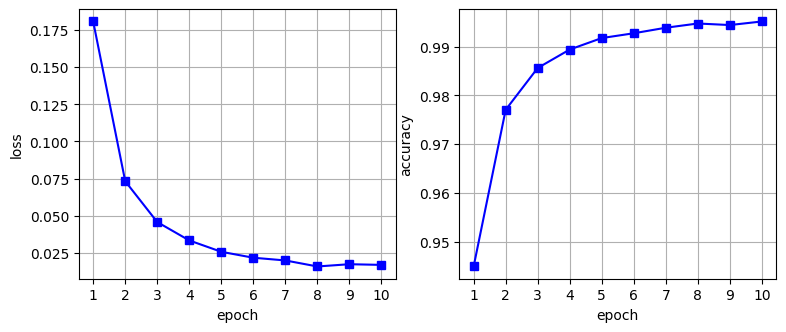

In [4]:
# Train the model
H = M.fit(x_train, y_train, batch_size=16, epochs=10, verbose=0)

# Plot training loss and accuracy
fig, axes = plt.subplots(1, 2, figsize=(9, 3.5))
xx = np.arange(1, len(H.history['loss'])+1)

ax = axes[0]
ax.grid()
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_xticks(xx)
ax.plot(xx, H.history['loss'], color='b', marker='s')

ax = axes[1]
ax.grid()
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
ax.set_xticks(xx)
ax.plot(xx, H.history['accuracy'], color='b', marker='s')

In [7]:
# Evaluate the model on test data
score = M.evaluate(x_test, y_test, verbose=0)
print(f'Loss: {score[0]:.4}\nPrecisión: {score[1]:.1%}')

Loss: 0.2385
Precisión: 97.9%


Hagamos un entrenamiento ahora con un batch de 20 y 20 épocas para fashion-mnist

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(f'Lectura: train {x_train.shape} {y_train.shape} test {x_test.shape} {y_test.shape}')

input_dim = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(-1, input_dim).astype("float32")
x_test = x_test.reshape(-1, input_dim).astype("float32")
print(f'Reformato 1: train {x_train.shape} {y_train.shape} test {x_test.shape} {y_test.shape}')

x_train_max = np.max(x_train)
x_train /= x_train_max
x_test /= x_train_max
print(f'Normalización [0,1]: max = {x_train_max}')

um_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(f'Reformato 2: train {x_train.shape} {y_train.shape} test {x_test.shape} {y_test.shape}')

Lectura: train (60000, 28, 28) (60000,) test (10000, 28, 28) (10000,)
Reformato 1: train (60000, 784) (60000,) test (10000, 784) (10000,)
Normalización [0,1]: max = 255.0
Reformato 2: train (60000, 784) (60000, 10) test (10000, 784) (10000, 10)


In [9]:
M = keras.Sequential([
    keras.Input(shape=(input_dim,)),
    keras.layers.Dense(800, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Print model summary
M.summary()

# Calculate number of parameters in each layer
print(f'Número de parámetros de la capa oculta: {784*800 + 800}')
print(f'Número de parámetros de la capa de salida: {800*10 + 10}')

# Compile the model
M.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 800)            │       628,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 636,010 (2.43 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

Número de parámetros de la capa oculta: 628000
Número de parámetros de la capa de salida: 8010


2024-11-14 23:45:06.637560: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


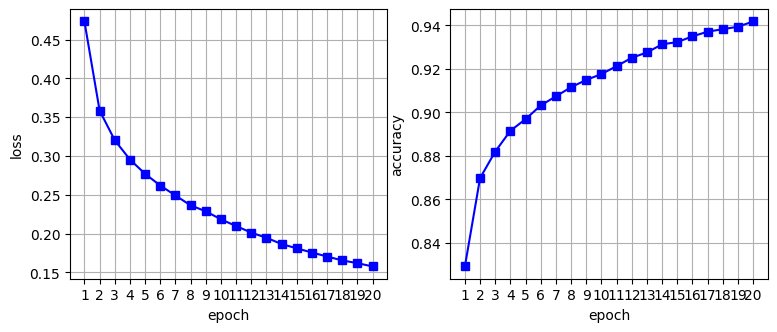

In [10]:
# Train the model
H = M.fit(x_train, y_train, batch_size=16, epochs=20, verbose=0)

# Plot training loss and accuracy
fig, axes = plt.subplots(1, 2, figsize=(9, 3.5))
xx = np.arange(1, len(H.history['loss'])+1)

ax = axes[0]
ax.grid()
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_xticks(xx)
ax.plot(xx, H.history['loss'], color='b', marker='s')

ax = axes[1]
ax.grid()
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
ax.set_xticks(xx)
ax.plot(xx, H.history['accuracy'], color='b', marker='s')